5.
classification models for wine dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
wine_dt = pd.read_csv('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/wine.csv')
wine_dt

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
y = wine_dt['Class']
x = wine_dt.drop('Class', axis=1)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt

DecisionTreeClassifier(criterion='entropy')

In [7]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
!pip install pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


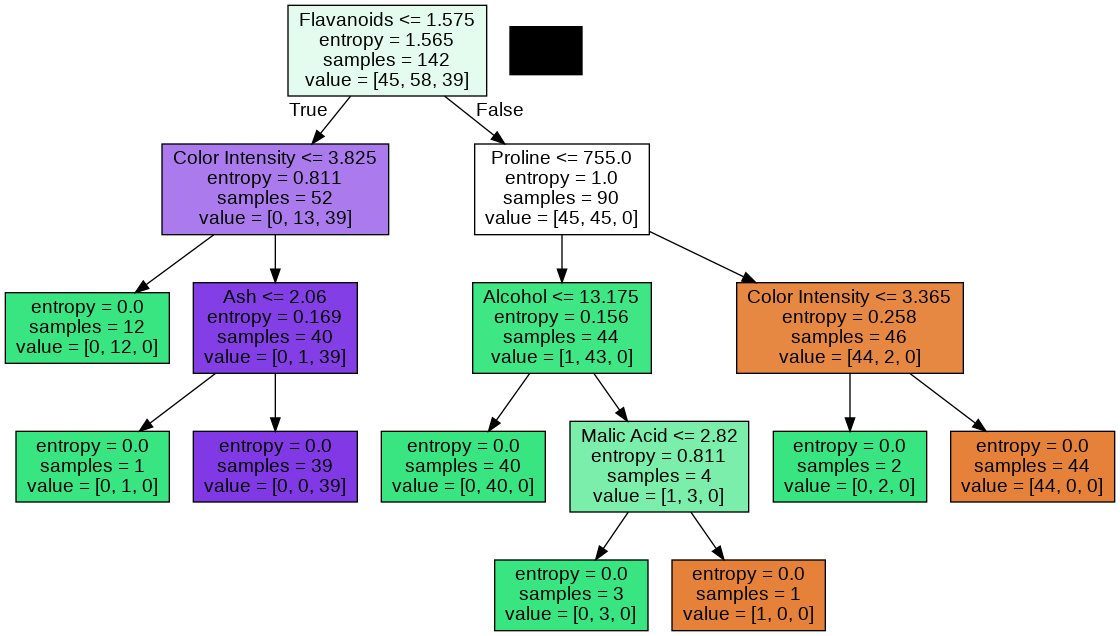

In [9]:
dot_data = StringIO()
export_graphviz(dt, feature_names=X_train.columns, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [10]:
from sklearn.metrics import confusion_matrix
y_predict = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_predict)
cm_dt

array([[13,  1,  0],
       [ 0, 13,  0],
       [ 0,  0,  9]])

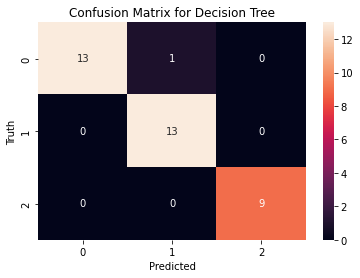

In [11]:
import seaborn as sns

sns.heatmap(cm_dt, annot=True)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Naive bayes

In [12]:
#loading of the dataset
wine_nb = pd.read_csv('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/wine.csv')
wine_nb


,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
inputs=wine_nb.drop('Class', axis=1)
target=wine_nb.Class

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, y_test=train_test_split(inputs,target, random_state=42, test_size=0.3)

In [15]:
from sklearn.naive_bayes import GaussianNB
GN=GaussianNB()

In [16]:
GN.fit(x_train,t_train)

GaussianNB()

In [17]:
GN.score(x_test, y_test)

1.0

In [18]:
GN.predict(x_test)

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3])

In [19]:
from sklearn.metrics import confusion_matrix
y_predict = GN.predict(x_test)
cm_GN = confusion_matrix(y_test, y_predict)
cm_GN

array([[19,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 14]])

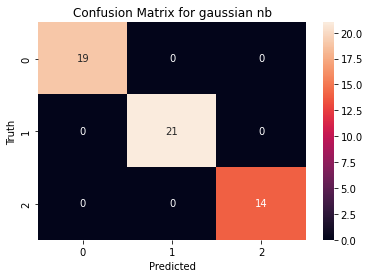

In [20]:
import seaborn as sns

sns.heatmap(cm_GN, annot=True)
plt.title('Confusion Matrix for gaussian nb')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

KNN

In [21]:
wine_knn = pd.read_csv('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/wine.csv')
wine_knn

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [22]:
target = wine_knn['Class']
inputs = wine_knn.drop('Class', axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3)

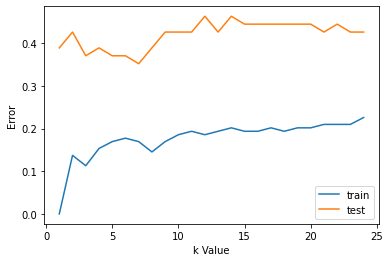

In [24]:
from sklearn.neighbors import KNeighborsClassifier
error1 = []
error2 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_train)
    error1.append(np.mean(y_train != y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))
plt.plot(range(1,25), error1, label="train")
plt.plot(range(1,25), error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
knn.score(x_test,y_test)

0.3888888888888889

In [28]:
knn.predict(x_test)

array([1, 1, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 2,
       3, 3, 2, 3, 2, 3, 2, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 2, 2, 2,
       2, 1, 3, 2, 3, 1, 2, 1, 1, 3])

In [29]:
from sklearn.metrics import confusion_matrix
y_predict = GN.predict(x_test)
cm_knn = confusion_matrix(y_test, y_predict)
cm_knn

array([[ 4,  7,  5],
       [ 9, 12,  4],
       [ 6,  2,  5]])

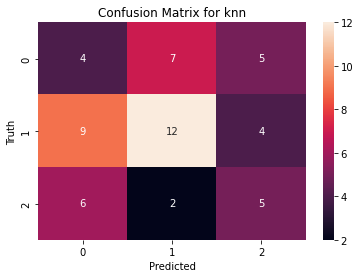

In [30]:
import seaborn as sns

sns.heatmap(cm_knn, annot=True)
plt.title('Confusion Matrix for knn')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

for the wines dataset naive bayes classifier is performing well than other classifiers used here. since confusion matrox for naive bayes is way better than other models.model score of naive bayes is large than others

D)Regression
7.

In [53]:
df_house = pd.read_csv('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/house.csv')
df_house.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


(array([ 146., 1333.,  908.,  329.,  134.,   51.,   14.,    9.,    4.,
           2.]),
 array([ 12789. ,  87010.1, 161231.2, 235452.3, 309673.4, 383894.5,
        458115.6, 532336.7, 606557.8, 680778.9, 755000. ]),
 <a list of 1 Patch objects>)

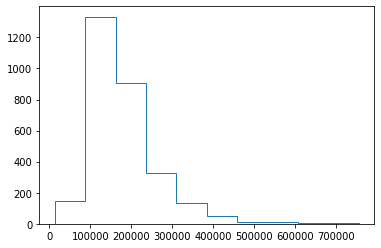

In [54]:
#salesprice
plt.hist(df_house['SalePrice'], histtype='step')

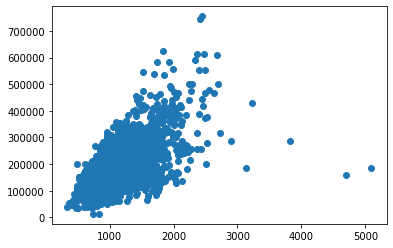

In [55]:
plt.scatter(df_house['1st Flr SF'], df_house['SalePrice'])

In [56]:
df_house.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [57]:
df_house.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [58]:
df_house.fillna(df_house['Lot Frontage'].mean(), inplace=True)

In [59]:
df_house.isnull().sum()

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64

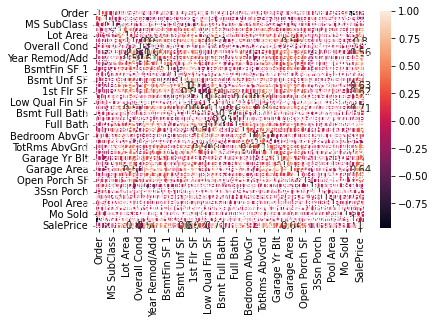

In [60]:
a=df_house.corr()
import seaborn as sns
sns.heatmap(a, annot=True)

In [61]:
a=df_house.corr()['SalePrice']
a.sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Area        0.640240
Total Bsmt SF      0.632539
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Mas Vnr Area       0.504772
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.433101
Lot Frontage       0.340751
Garage Cars        0.331554
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
2nd Flr SF         0.269373
Lot Area           0.266549
Garage Yr Blt      0.254455
Bsmt Unf SF        0.183251
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Bsmt Full Bath     0.077651
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005840
Bsmt Half Bath    -0.004474
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

In [62]:
df_house['Garage Area'].fillna(df_house['Garage Area'].mean(), inplace=True)

In [63]:

df_house['Total Bsmt SF'].fillna(df_house['Total Bsmt SF'].mean(), inplace=True)


In [64]:
inputs = df_house.loc[:, ['1st Flr SF', '2nd Flr SF', 'Garage Area', 'Total Bsmt SF', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Year Built', 'Yr Sold']]
inputs.head()

,1st Flr SF,2nd Flr SF,Garage Area,Total Bsmt SF,Wood Deck SF,Open Porch SF,Lot Area,Year Built,Yr Sold
0,1656,0,528.0,1080.0,210,62,31770,1960,2010
1,896,0,730.0,882.0,140,0,11622,1961,2010
2,1329,0,312.0,1329.0,393,36,14267,1958,2010
3,2110,0,522.0,2110.0,0,0,11160,1968,2010
4,928,701,482.0,928.0,212,34,13830,1997,2010


In [65]:
target = df_house['SalePrice']
target.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

In [66]:
input=df_house[['1st Flr SF', '2nd Flr SF', 'Garage Area', 'Total Bsmt SF', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Year Built', 'Yr Sold']]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3)

In [67]:
l= LinearRegression(fit_intercept=True)

In [68]:
l.fit(X_train, y_train)

LinearRegression()

In [69]:
l.intercept_

-612816.1108022828

In [70]:
l.coef_

array([ 6.80246670e+01,  6.51569197e+01,  6.55037345e+01,  3.57941673e+01,
        4.41826331e+01,  3.04388254e+00,  2.95847735e-01,  6.90643303e+02,
       -3.70996526e+02])

In [71]:
l_predict=l.predict(X_test)

Text(0, 0.5, 'Predicted values')

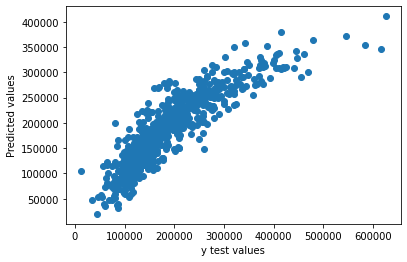

In [72]:
plt.scatter(y_test,l_predict)
plt.xlabel('y test values')
plt.ylabel('Predicted values')

In [74]:
from statsmodels.formula.api import ols
ols = ols("SalePrice ~ Q('1st Flr SF') + Q('2nd Flr SF') + Q('Garage Area') + Q('Total Bsmt SF') + Q('Wood Deck SF') + Q('Open Porch SF') + Q('Lot Area') + Q('Year Built') + Q('Yr Sold')", data=df_house).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     908.9
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:13:48   Log-Likelihood:                -35276.
No. Observations:                2930   AIC:                         7.057e+04
Df Residuals:                    2920   BIC:                         7.063e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.153e+05   1.16

In [77]:
from sklearn import metrics
print(f'MAE: {metrics.mean_absolute_error(y_test, l_predict)}')
print(f'MSE: {metrics.mean_squared_error(y_test, l_predict)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, l_predict))}')

MAE: 25578.28056272152
MSE: 1424047842.9751582
RMSE: 37736.558441054985


KNN

In [87]:
knn = KNeighborsClassifier(n_neighbors=15)


In [88]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [89]:
ypredict=knn.predict(X_test)

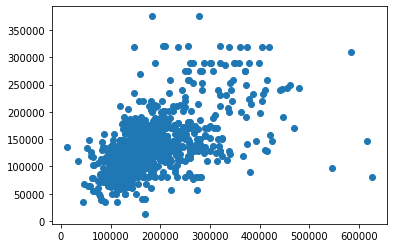

In [91]:
plt.scatter(y_test,ypredict)

8.
Implement a logistic regression model – employ scikit-learn library functions. 

In [92]:
train = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/titanic/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/titanic/test.csv")

In [93]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [95]:
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())
train["Pclass"] = train["Pclass"].fillna(train["Pclass"].mode())
train = train.fillna({"Embarked": "S"})

In [96]:
train.drop(['Name', 'Cabin', 'Ticket'], axis = 1,inplace=True)
test.drop(['Name', 'Cabin', 'Ticket'], axis = 1,inplace=True)

In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Sex_n'] = le.fit_transform(train['Sex'])
test['Sex_n'] = le.fit_transform(test['Sex'])

In [98]:
train['Embarked_n'] = le.fit_transform(train['Embarked'])
test['Embarked_n'] = le.fit_transform(test['Embarked'])

In [99]:
train.drop(['Fare', 'Sex', 'Embarked', 'PassengerId'], axis = 1,inplace=True)
test.drop(['Fare', 'Sex', 'Embarked'], axis = 1,inplace=True)


In [100]:
inputs = train.drop(['Survived'], axis=1)
target = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.25)

In [104]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(fit_intercept=True)

In [105]:
LR.fit(X_train, y_train)

LogisticRegression()

In [106]:
from sklearn.metrics import classification_report
y_pred = LR.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       147
           1       0.75      0.63      0.69        76

    accuracy                           0.80       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.80      0.80      0.80       223



In [107]:
cm_titanic = confusion_matrix(y_test, y_pred)
cm_titanic

array([[131,  16],
       [ 28,  48]])

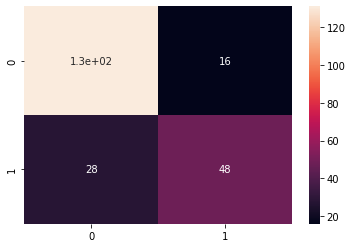

In [108]:
sns.heatmap(cm_titanic, annot=True)

plt.show()